# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

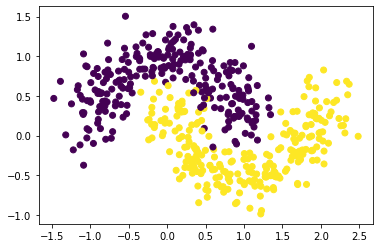

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.show()

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

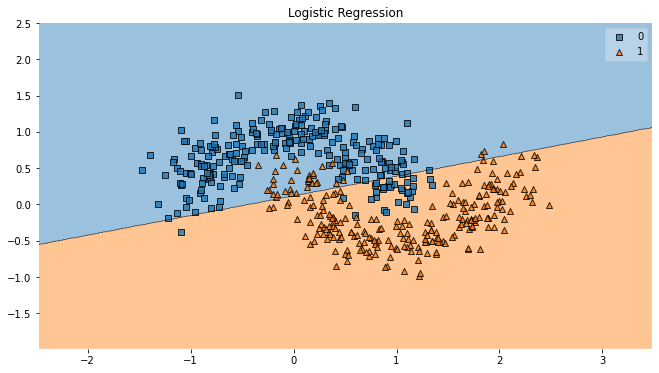

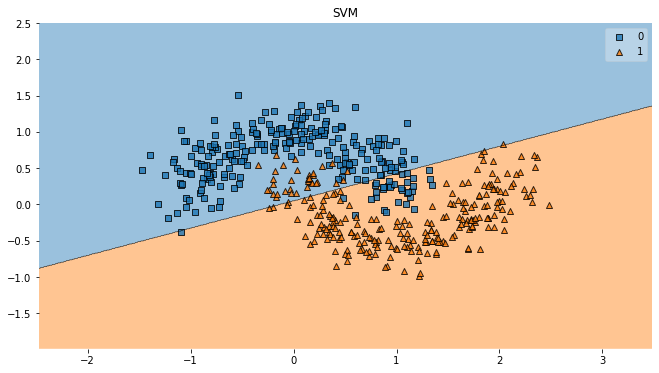

LR accuracy =  0.86
SVM accuracy =  0.858


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions


def plot_decisions(data, target, estimator, est_name):    
    plt.figure(figsize=(11, 6))
    fig = plot_decision_regions(X=data, 
                                y=target,
                                clf=estimator)
    plt.title(est_name)
    plt.show()
    

lr = LogisticRegression(C=10, max_iter=200, random_state=42)
svm = SVC(kernel='linear', C=0.1, max_iter=200, random_state=42)

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

plot_decisions(moons_points, moons_labels, lr, "Logistic Regression")
print("LR accuracy = ", accuracy_score(lr.predict(moons_points), moons_labels))

plot_decisions(moons_points, moons_labels, svm, "SVM")
print("SVM accuracy = ", accuracy_score(svm.predict(moons_points), moons_labels))

**Вывод:** Лог.регрессия и SVM неплохо классифицируют объекты, но данные алгоритмы слишком просты, поскольку из рисунка становится очевидно, что разделяющая поверхность имеет более сложный вид

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

1) Качество всех нижеприведённых моделей стало значительно лучше, так как модели теперь могут строить более сложные разделяющие поверхности

In [158]:
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning


simplefilter("ignore", category=ConvergenceWarning)

Разделяющая поверхность сильно походит на многочлен степени 3, но ввиду регуляризации он слегка искажён  
3) Полиномиальное ядро степени 3 является наиболее оптимальным, поскольку дав класса прекрасно разделяются многочленом степени 3.  

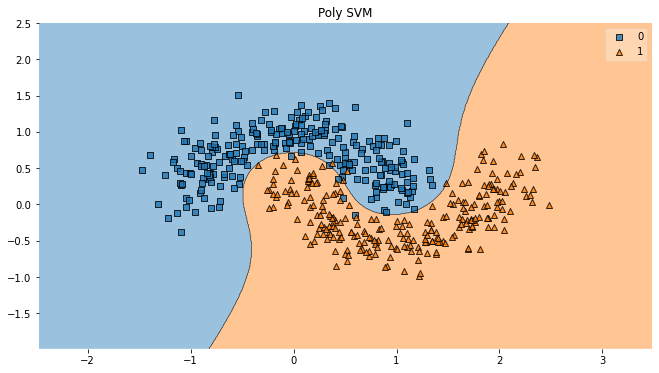

Poly SVM accuracy = 0.982
Best params: {'C': 50, 'coef0': 1}


In [108]:
# Poly kernel with degree = 3
cub_deg_params = {
    'C': [0.02, 0.2, 1, 5, 10, 50, 200], 
    'coef0': [-10, -5, -1, 0, 1, 5, 10], 
}

cub_deg_svm = SVC(kernel='poly', degree=3, max_iter=200, tol=0.01, random_state=42)
cub_deg_grid = GridSearchCV(cub_deg_svm, cub_deg_params, scoring='accuracy', cv=5)
cub_deg_grid.fit(moons_points, moons_labels)

plot_decisions(moons_points, moons_labels, cub_deg_grid, "Poly SVM")
print("Poly SVM accuracy =", accuracy_score(cub_deg_grid.predict(moons_points), moons_labels))
print("Best params:", cub_deg_grid.best_params_)

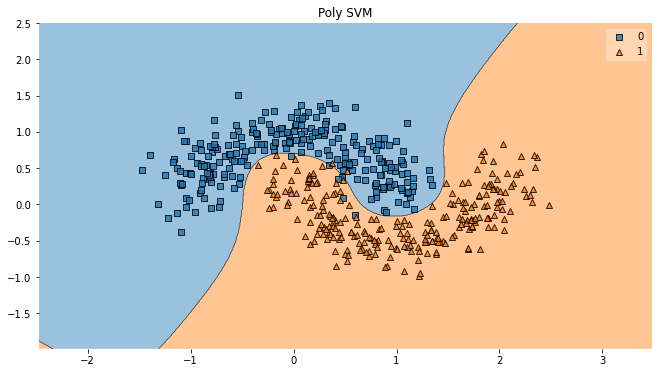

Poly SVM accuracy = 0.984
Best params: {'C': 5, 'coef0': 1, 'degree': 6}


In [179]:
# Poly kernel with degree >= 3
poly_params = {
    'degree': [3, 4, 5, 6, 7], 
    'C': [0.02, 0.2, 1, 5, 10, 50, 200], 
    'coef0': [-10, -5, -1, 0, 1, 5, 10], 
}

poly_svm = SVC(kernel='poly', max_iter=200, tol=0.01, random_state=42)
poly_grid = GridSearchCV(poly_svm, poly_params, scoring='accuracy', cv=5)
poly_grid.fit(moons_points, moons_labels)

plot_decisions(moons_points, moons_labels, poly_grid, "Poly SVM")
print("Poly SVM accuracy =", accuracy_score(poly_grid.predict(moons_points), moons_labels))
print("Best params:", poly_grid.best_params_)

При бОльших значениях параметра `degree` качество модели не сильно улучшилось

Разделяющая поверхность представляет собой замкнутую кривую

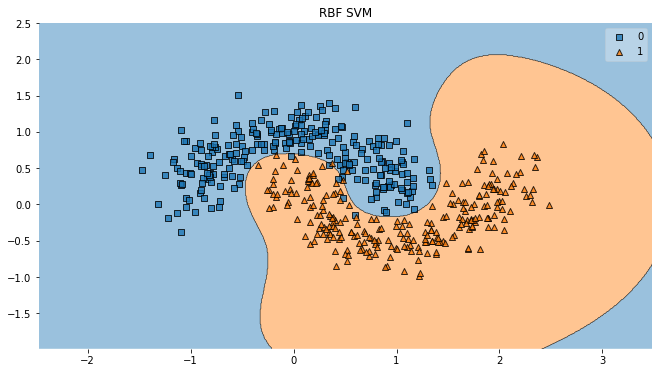

RBF SVM accuracy = 0.984
Best params: {'C': 200, 'gamma': 1}


In [100]:
# RBF kernel
rbf_params = {
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.05, 0.2, 1, 5, 20], 
    'C': [0.02, 0.2, 1, 5, 10, 50, 200], 
}

rbf_svm = SVC(kernel='rbf', max_iter=200, tol=0.01, random_state=42)
rbf_grid = GridSearchCV(rbf_svm, rbf_params, scoring='accuracy', cv=5)
rbf_grid.fit(moons_points, moons_labels)

plot_decisions(moons_points, moons_labels, rbf_grid, "RBF SVM")
print("RBF SVM accuracy =", accuracy_score(rbf_grid.predict(moons_points), moons_labels))
print("Best params:", rbf_grid.best_params_)

Разделяющая поверхность похожа на многочлен степени 4, причём по сравнению с предыдущими она более гладкая и не содержит никаких искажений

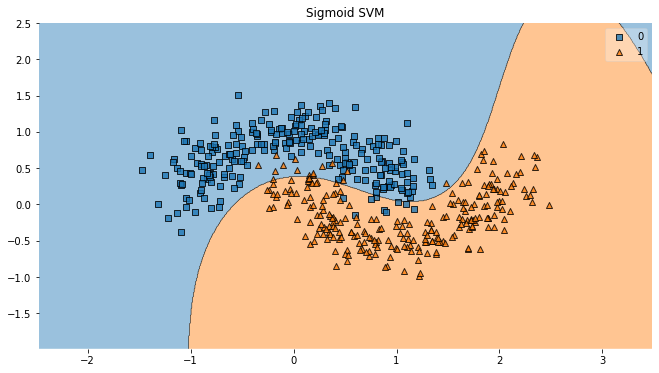

Sigmoid SVM accuracy = 0.952
Best params: {'C': 200, 'coef0': -5, 'gamma': 1}


In [101]:
# Sigmoid kernel
sigm_params = {
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.05, 0.2, 1, 5, 20], 
    'C': [0.02, 0.2, 1, 5, 10, 50, 200], 
    'coef0': [-100, -50, -10, -5, -1, 0, 1, 5, 10, 50, 100],
}

sigm_svm = SVC(kernel='sigmoid', max_iter=200, tol=0.01, random_state=42)
sigm_grid = GridSearchCV(sigm_svm, sigm_params, scoring='accuracy', cv=5)
sigm_grid.fit(moons_points, moons_labels)

plot_decisions(moons_points, moons_labels, sigm_grid, "Sigmoid SVM")
print("Sigmoid SVM accuracy =", accuracy_score(sigm_grid.predict(moons_points), moons_labels))
print("Best params:", sigm_grid.best_params_)

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

1) Разделяющая пов-ть - многочлен 3 степени, но в отличие от полиномиального ядра не содержит никаких искажений. 
Однако качество этой модели чуть хуже (на 0.016)  

2) В `PolynomialFeatures` использовал `degree=3` (почему - писал выше)

In [142]:
from sklearn.preprocessing import PolynomialFeatures


cub_transformer = PolynomialFeatures(degree=3)
data_cubed = cub_transformer.fit_transform(moons_points)

lr = LogisticRegression(max_iter=300, random_state=42)
lr.fit(data_cubed, moons_labels)

LogisticRegression(max_iter=300, random_state=42)

/tmp/ipykernel_46523/3346431297.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2)


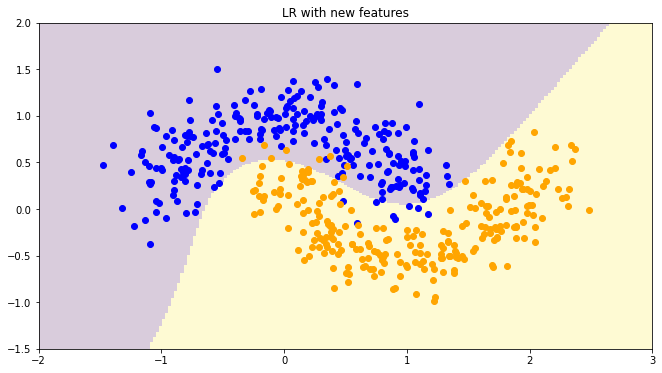

LR accuracy =  0.968


In [143]:
xx, yy = np.meshgrid(np.linspace(-2, 3, 200), np.linspace(-1.5, 2, 200))
grid = np.vstack([xx.ravel(), yy.ravel()]).T
cubed_grid = cub_transformer.transform(grid)
Z = lr.predict(cubed_grid).reshape(xx.shape)

zero_type_points = moons_points[np.nonzero(moons_labels == 0)]
first_type_points = moons_points[np.nonzero(moons_labels == 1)]

plt.figure(figsize=(11, 6))
plt.pcolormesh(xx, yy, Z, alpha=0.2)
plt.scatter(zero_type_points[:, 0], zero_type_points[:, 1], c='blue')
plt.scatter(first_type_points[:, 0], first_type_points[:, 1], c='orange')
plt.title("LR with new features")
plt.show()

print("LR accuracy = ", accuracy_score(lr.predict(data_cubed), moons_labels))

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

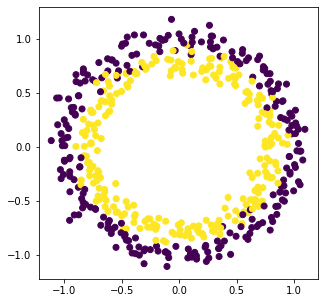

In [144]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)
plt.show()

Let's apply logistic regression with squared features!

Для данного датасета выбрал полиномиальные фичи степени 2, так как окружность задаётся с помощью полинома степени 2

/tmp/ipykernel_46523/172379012.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2)


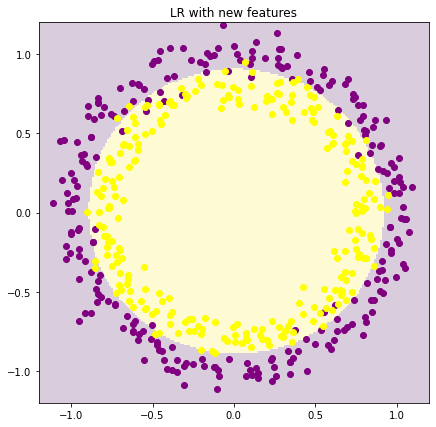

LR accuracy =  0.942


In [149]:
sq_transformer = PolynomialFeatures(degree=2)
data_sq = sq_transformer.fit_transform(circles_points)

lr = LogisticRegression(max_iter=300, random_state=42)
lr.fit(data_sq, circles_labels)

xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 200), np.linspace(-1.2, 1.2, 200))
grid = np.vstack([xx.ravel(), yy.ravel()]).T
sq_grid = sq_transformer.transform(grid)
Z = lr.predict(sq_grid).reshape(xx.shape)

zero_type_points = circles_points[np.nonzero(circles_labels == 0)]
first_type_points = circles_points[np.nonzero(circles_labels == 1)]

plt.figure(figsize=(7, 7))
plt.pcolormesh(xx, yy, Z, alpha=0.2)
plt.scatter(zero_type_points[:, 0], zero_type_points[:, 1], c='purple')
plt.scatter(first_type_points[:, 0], first_type_points[:, 1], c='yellow')
plt.title("LR with new features")
plt.show()

print("LR accuracy = ", accuracy_score(lr.predict(data_sq), circles_labels))

And even more:

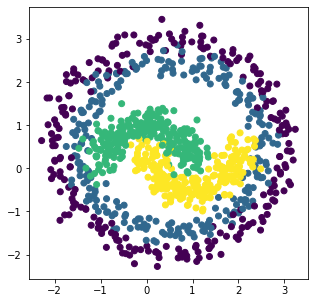

In [145]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Для логистической регрессии использовал полиномиальные фичи степени 3.  
Гиперпараметры модели были получены с помощью GridSearch (в коде подбор параметров не приведён, т.к. код и так громоздкий)

/tmp/ipykernel_46523/501788409.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.5)


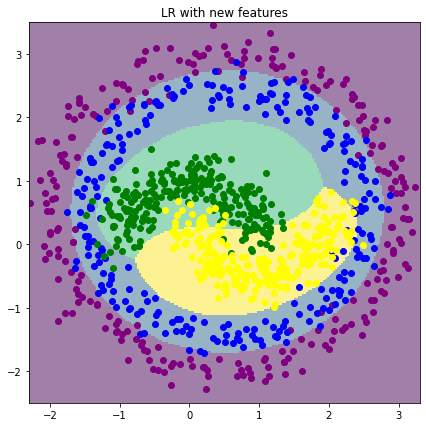

LR accuracy =  0.905


In [177]:
cub_transformer = PolynomialFeatures(degree=3)
data_cubed = cub_transformer.fit_transform(points)

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                        max_iter=300, penalty='l1', C=50, random_state=42)
lr.fit(data_cubed, labels)

xx, yy = np.meshgrid(np.linspace(-2.3, 3.3, 200), np.linspace(-2.5, 3.5, 200))
grid = np.vstack([xx.ravel(), yy.ravel()]).T
cub_grid = cub_transformer.transform(grid)
Z = lr.predict(cub_grid).reshape(xx.shape)

zero_type_points = points[np.nonzero(labels == 0)]
first_type_points = points[np.nonzero(labels == 1)]
second_type_points = points[np.nonzero(labels == 2)]
third_type_points = points[np.nonzero(labels == 3)]

plt.figure(figsize=(7, 7))
plt.pcolormesh(xx, yy, Z, alpha=0.5)
plt.scatter(zero_type_points[:, 0], zero_type_points[:, 1], c='purple')
plt.scatter(first_type_points[:, 0], first_type_points[:, 1], c='blue')
plt.scatter(second_type_points[:, 0], second_type_points[:, 1], c='green')
plt.scatter(third_type_points[:, 0], third_type_points[:, 1], c='yellow')
plt.title("LR with new features")
plt.show()

print("LR accuracy = ", accuracy_score(lr.predict(data_cubed), labels))

Тут было использовано ядро `rbf`. Качество модели на несколько сотых лучше, чем у логистической регрессии

/tmp/ipykernel_46523/240196350.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.5)


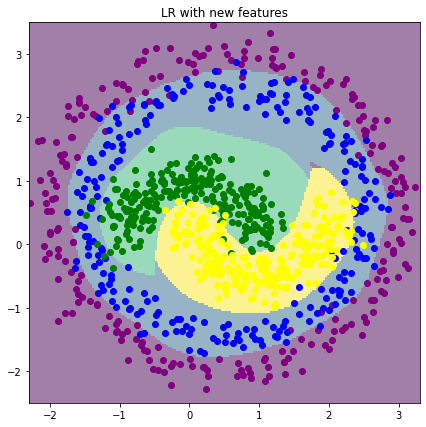

Sigmoid SVM accuracy = 0.944


In [176]:
rbf_svm = SVC(kernel='rbf', max_iter=200, tol=0.01, gamma=1, C=5, random_state=42)
rbf_svm.fit(points, labels)

xx, yy = np.meshgrid(np.linspace(-2.3, 3.3, 200), np.linspace(-2.5, 3.5, 200))
grid = np.vstack([xx.ravel(), yy.ravel()]).T
Z = rbf_svm.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7, 7))
plt.pcolormesh(xx, yy, Z, alpha=0.5)
plt.scatter(zero_type_points[:, 0], zero_type_points[:, 1], c='purple')
plt.scatter(first_type_points[:, 0], first_type_points[:, 1], c='blue')
plt.scatter(second_type_points[:, 0], second_type_points[:, 1], c='green')
plt.scatter(third_type_points[:, 0], third_type_points[:, 1], c='yellow')
plt.title("LR with new features")
plt.show()

print("Sigmoid SVM accuracy =", accuracy_score(rbf_svm.predict(points), labels))